# Import Dependencies


In [1]:
import pandas as pd
from sklearn import datasets

## Load iris data set and convert it to data frame


In [2]:
iris = datasets.load_iris()

In [3]:
df = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df['target']=iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [7]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

## split Data frame into X and Y and perform train-test split

In [8]:
X = df.drop('target',axis=1)
Y = df['target']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42)
print(X_test.shape[0])
print(X_train.shape[0])
print(Y_test.shape[0])
print(Y_train.shape[0])

38
112
38
112


## Standard scaling of data

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)
X_test_scaled

array([[ 0.25621067, -0.71903739,  0.58987181,  0.05585913],
       [-0.21299441,  1.61629772, -1.03834577, -1.06789518],
       [ 2.13303102, -1.18610441,  1.78389803,  1.42933663],
       [ 0.1389094 , -0.48550388,  0.48132397,  0.43044391],
       [ 1.07731957, -0.71903739,  0.64414573,  0.30558231],
       [-0.56489823,  0.68216368, -1.14689361, -0.94303359],
       [-0.33029569, -0.48550388, -0.00714131,  0.18072072],
       [ 1.19462085, -0.01843686,  0.80696748,  1.42933663],
       [ 0.37351194, -2.12023846,  0.48132397,  0.43044391],
       [-0.09569314, -0.9525709 ,  0.15568045,  0.05585913],
       [ 0.72541576,  0.21509665,  0.80696748,  1.05475186],
       [-1.26870586, -0.25197037, -1.20116753, -1.31761837],
       [-0.44759696,  0.91569719, -1.25544145, -1.19275678],
       [-1.15140459, -0.01843686, -1.14689361, -1.31761837],
       [-0.91680205,  1.61629772, -1.14689361, -1.06789518],
       [ 0.49081322,  0.44863017,  0.58987181,  0.5553055 ],
       [ 0.72541576, -0.

In [10]:
type(X_test)

pandas.core.frame.DataFrame

In [11]:
X_test.mean()

sepal length (cm)    5.881579
sepal width (cm)     3.107895
petal length (cm)    3.613158
petal width (cm)     1.155263
dtype: float64

In [12]:
type(X_test_scaled)

numpy.ndarray

In [12]:
X_test_scaled.mean()

3.5059674461847047e-17

In [13]:
#transform X_test scaled to data frame
X_test_scaled = pd.DataFrame(X_test_scaled,columns=['sepal length','sepal width','petal length','petal width'])
X_test_scaled

,sepal length,sepal width,petal length,petal width
0,0.256211,-0.719037,0.589872,0.055859
1,-0.212994,1.616298,-1.038346,-1.067895
2,2.133031,-1.186104,1.783898,1.429337
3,0.138909,-0.485504,0.481324,0.430444
4,1.077320,-0.719037,0.644146,0.305582
5,-0.564898,0.682164,-1.146894,-0.943034
6,-0.330296,-0.485504,-0.007141,0.180721
7,1.194621,-0.018437,0.806967,1.429337
8,0.373512,-2.120238,0.481324,0.430444
9,-0.095693,-0.952571,0.155680,0.055859


In [14]:
X_test_scaled['petal width'].mean()

6.427606984671959e-17

In [15]:
X_test_scaled.describe()

,sepal length,sepal width,petal length,petal width
count,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01
mean,-2.278879e-16,5.434250e-16,-2.512610e-16,6.427607e-17
std,1.013423e+00,1.013423e+00,1.013423e+00,1.013423e+00
min,-1.737911e+00,-2.120238e+00,-1.418263e+00,-1.317618e+00
25%,-8.874767e-01,-7.190374e-01,-1.133325e+00,-1.067895e+00
50%,2.160813e-02,-1.843686e-02,4.541870e-01,1.807207e-01
75%,6.960904e-01,6.237803e-01,7.933990e-01,8.986749e-01
max,2.367634e+00,3.017499e+00,1.783898e+00,1.429337e+00


In [16]:
X_test.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,38.000000,38.000000,38.000000,38.000000
mean,5.881579,3.107895,3.613158,1.155263
std,0.863949,0.433952,1.867238,0.811637
min,4.400000,2.200000,1.000000,0.100000
25%,5.125000,2.800000,1.525000,0.300000
50%,5.900000,3.100000,4.450000,1.300000
75%,6.475000,3.375000,5.075000,1.875000
max,7.900000,4.400000,6.900000,2.300000


## PCA

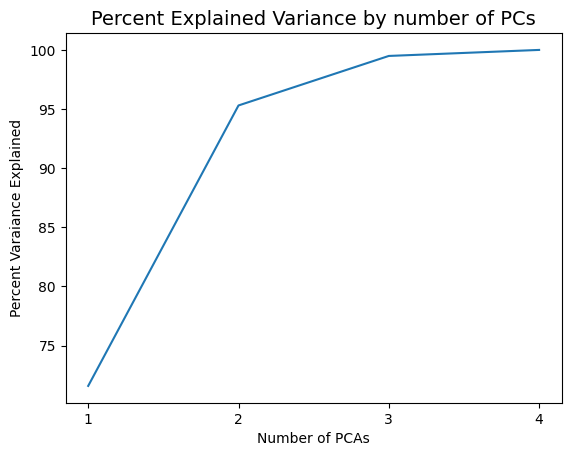

In [17]:
from sklearn.decomposition import PCA
pca = PCA(random_state = 42)
pca.fit(X_train_scaled)
num_features = [1,2,3,4]
explained_variance = pca.explained_variance_ratio_.cumsum()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(num_features,100*explained_variance)
plt.xticks(ticks=[1,2,3,4])
plt.xlabel('Number of PCAs')
plt.ylabel('Percent Varaiance Explained')
plt.title('Percent Explained Variance by number of PCs',fontsize=14)
plt.show()

In [18]:
#transform original columns of X_train_scaled, X_test_scaled to PCs
#option one:choose the number of componenets
pca = PCA(n_components=2,random_state=42)
#option two:choose the fraction of explained variance to capture
# pca = PCA(n_components=0.8,random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.fit_transform(X_test_scaled)

X_train_pca = pd.DataFrame(X_train_pca,columns=['PC1','PC2'])
X_test_pca = pd.DataFrame(X_test_pca,columns=['PC1','PC2'])

X_train_pca.head()


,PC1,PC2
0,-2.438563,-0.735586
1,-2.634283,-1.886271
2,1.134202,0.685307
3,0.435677,-0.874250
4,1.044878,-0.545556


In [19]:
X_train_pca.corr()

,PC1,PC2
PC1,1.000000e+00,3.848983e-17
PC2,3.848983e-17,1.000000e+00


In [20]:
#weights applied to each of the original columns in creating the corresponding PC
pca.components_

array([[ 0.5193415 , -0.32575195,  0.56368073,  0.55356491],
       [ 0.38702083,  0.91321628,  0.06152643,  0.11164859]])

## Train and evaluate with normal data

In [21]:
from sklearn.neighbors import KNeighborsClassifier
Knn_regular = KNeighborsClassifier(n_neighbors=5)
Knn_pca = KNeighborsClassifier(n_neighbors=5)
import time
start = time.time()
Knn_regular.fit(X_train,Y_train)
accuracy_regular=Knn_regular.score(X_test,Y_test)
end = time.time()
elapsed_regular = end - start
print('Regular model train and test time is '+str(elapsed_regular))
print('Regular model accuracy'+str(accuracy_regular))
predictions = Knn_regular.predict(X_test)
predictions

Regular model train and test time is 0.00789642333984375
Regular model accuracy1.0


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [22]:
start = time.time()
Knn_pca.fit(X_train_pca,Y_train)
accuracy_pca=Knn_pca.score(X_test_pca,Y_test)
end = time.time()
elapsed_pca = end - start
print('PCA model train and test time is '+str(elapsed_pca))
print('PCA model accuracy'+str(accuracy_pca))

PCA model train and test time is 0.006544589996337891
PCA model accuracy0.868421052631579
